In [1]:
from _util import *
import _Experiment as _Experiment
import Agents_MNL._agent_MNL_TS_geometric as _agent_MNL_TS_Geom
import Agents_MNL._agent_MNL_Linear_TS_geometric as _agent_MNL_Linear_TS_Geom
import Agents_MNL._agent_MNL_MTTS_geometric as _agent_MNL_MTTS_Geom
import Agents_MNL._agent_MNL_contextual_UCB as _agent_MNL_contextual_UCB
reload(_agent_MNL_contextual_UCB)
reload(_Experiment)
reload(_agent_MNL_MTTS_Geom)
reload(_agent_MNL_TS_Geom)
reload(_agent_MNL_Linear_TS_Geom)
import pickle

In [2]:
# MNL_UCB_Contextual_agent = _agent_MNL_contextual_UCB.MNL_UCB_Contextual_agent(L, r, K, Xs = feature
#                                         ,  k = 1/4, seed = 42, same_reward = True, update_freq=100)

In [3]:
#import random
#selected_movies = random.sample(list(range(L)),8000)

In [22]:
L, T, K, p = 2818, 50000, 10, 20
with_intercept = False
same_reward = True
based_param = "utility"
X_mu = None
X_sigma = None
n_init = 300
Sigma_gamma_factor = p * 2
results = {}
d = 20
phi_beta = 0.002
X_transform = 'l2'
with_intercept = 0
d=20
fp = 'Data/MNL_realdata_d_{}_X_transform_{}_with_intercept_{}'.format(d, X_transform, with_intercept)
#fp = 'MNL_real_dataset/MNL_realdata_binary_d_{}_X_transform_{}_with_intercept_{}'.format(d, X_transform, with_intercept)
out = load(fp)

update_freq = 200
update_freq_linear = 200

pm_core = 16

In [23]:
p = d
if with_intercept:
    p += 1
mu_gamma = np.zeros(p)
sigma_gamma = np.identity(p)

true_gamma = out['true_gamma_wrt_test']
true_v = out['W_test_mean'].copy()#[selected_movies]
X = out['movie_features'].copy()#[selected_movies,:]

real = True

L=2818 T=50000 K=10 p=20 phi_beta=0.002 Bandit_type=MNL with_intercept=0 save_prefix=MNL_real Sigma_gamma_factor=40 Sigma_x_factor=1 MTS_freq=200 GLB_freq=200 n_init=300 alpha_GLB=1 used_agends=all LB_freq=1 based_param=utility
batch = 0


Feature-determined TS: 100%|██████████| 50000/50000 [27:10<00:00, 30.66it/s]


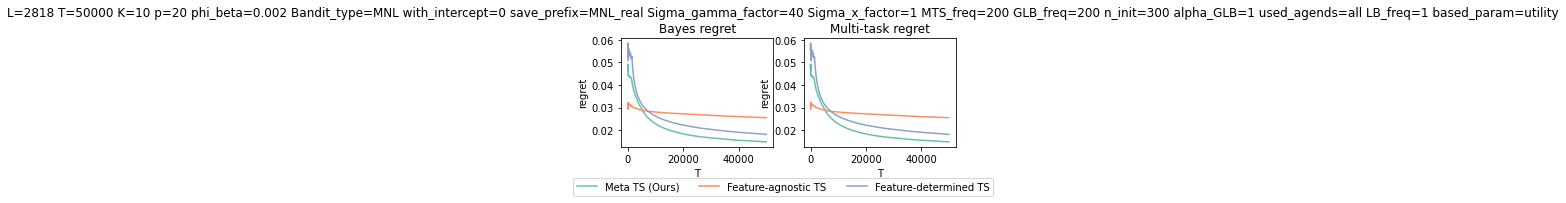

phi_beta0.002_Bandit_typeMNL_with_intercept0_Sigma_gamma_factor40_Sigma_x_factor1_MTS_freq200_GLB_freq200_n_init300_alpha_GLB1_used_agendsall_LB_freq1_based_paramutility
save to res/0801/MNL/_L2818_T50000_K10_p20/phi_beta0.002_Bandit_typeMNL_with_intercept0_Sigma_gamma_factor40_Sigma_x_factor1_MTS_freq200_GLB_freq200_n_init300_alpha_GLB1_used_agendsall_LB_freq1_based_paramutility-MNL_real


In [ ]:
reload(_Experiment)
run = _Experiment.run_experiment(L = L, T = T, K = K, p = p
                                 , phi_beta = phi_beta, Bandit_type = "MNL", real = real
                                 #, print_SNR = True
                                 #, debug_MTB = False
                                 #, only_ratio = False   
                                 , with_intercept = with_intercept, same_reward = same_reward, clip = True
                                 , save_prefix = "MNL_real"
                                 , Sigma_gamma_factor = Sigma_gamma_factor
#                                  , Sigma_x_factor = Sigma_x_factor
                                 #, misspecification = None
                                 , MTS_freq = update_freq
                                 , GLB_freq = update_freq_linear
#                                          , alpha_GLB = 0.25
                                 , n_init = n_init
                                 , based_param = based_param, true_gamma = true_gamma, true_v = true_v, X = X
#                                         , used_agends = ["Oracle TS", "Feature-agnostic TS"]
                                )


r = run.run_multiple_parallel_in_batch(reps = 10, parallel = 'ray')
run.plot_regret(plot_mean = True)
run.save(sub_folder = ["L", "T", "K", "p"])

In [26]:
1

1

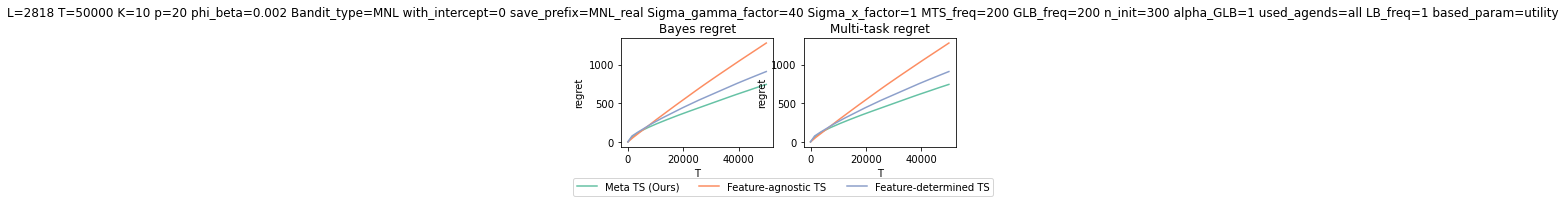

In [25]:
run.plot_regret(plot_mean = False)

In [20]:
run.save(sub_folder = ["L", "T", "K", "p"])

based_paramutility_LB_freq1_used_agendsall_alpha_GLB1_n_init300_GLB_freq500_MTS_freq500_Sigma_x_factor1_Sigma_gamma_factor10_with_intercept1_Bandit_typeMNL_phi_beta0.002
save to res/0729/MNL/_L8000_T20000_K5_p6/based_paramutility_LB_freq1_used_agendsall_alpha_GLB1_n_init300_GLB_freq500_MTS_freq500_Sigma_x_factor1_Sigma_gamma_factor10_with_intercept1_Bandit_typeMNL_phi_beta0.002-MNL_real


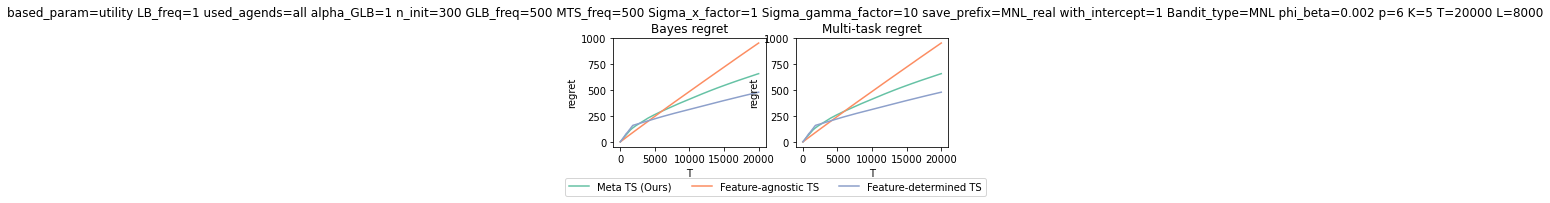

In [21]:
run.plot_regret(#ci = 68, 
                skip = 9
                , plot_mean = False
                )